<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第6课 使用Python和pandas统计入门 </h1>

<h1, align="center">波士顿房屋数据</h1>

我们将会分析波士顿的房屋数据，数据将包括：
 
1) Age: 1940年之前在每个城镇建立的自有住房的比例

2) MV: 每个城镇的房价中位数（单位是$1000）

我们将计算平均数、中位数、标准差，来分析不同城镇内的房屋情况。



<h2, align=center>获得数据</h2>

#### 使用下面的链接直接下载数据

In [ ]:
#linux !wget --output-document /resources/data/ageprice.csv https://ibm.box.com/shared/static/05u2mb2x4n9ak8gffmnelydx0ibdeqzh.csv
# 自行下载

#### 导入所需的依赖库：pandas，matplotlib

In [71]:
# 如果这段发生错误No module named 'seaborn'，则解注释下列这句话先安装一下这个库，以管理员权限在命令行中输入“conda install seaborn”安装seaborn

import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

%matplotlib inline  

这个帮助函数涵盖了正太分布和直方图。

In [72]:
def NormalandHistogram( DataFrame):
    
    mu=DataFrame.mean()
    sigma=DataFrame.std()
    x=DataFrame.values.flatten()
       # the histogram of the data
    n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.75)

    # add a 'best fit' line
    y = norm.pdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.xlabel('x')
    plt.ylabel('Probability')
    

#### 使用`pd.read_csv`读取数据 

In [73]:
df=pd.read_csv("resources/data/ageprice.csv")
df.head(5)

,Unnamed: 0,AGE,MV
0,0,65.199997,24.000000
1,1,78.900002,21.600000
2,2,61.099998,34.700001
3,3,45.799999,33.400002
4,4,54.200001,36.200001


# <h1, align=center>数据清洗</h1>

删除额外的列

In [74]:
del df['Unnamed: 0']

#### 使用head方法展示前5行

In [75]:
df.head(5)

,AGE,MV
0,65.199997,24.000000
1,78.900002,21.600000
2,61.099998,34.700001
3,45.799999,33.400002
4,54.200001,36.200001


 <h1, align=center> 统计分析  </h1>




1) 计算下列平均值：
a) 1940年之前房屋建造的比例
b) 房屋的价值   


In [76]:
df.mean()

AGE    68.574901
MV     22.532806
dtype: float64

2) 计算中位数，统计内容同上   

In [77]:
df.median()

AGE    77.500000
MV     21.200001
dtype: float64

3) 计算标准差，内容同上:  

In [78]:
df.std()

AGE    28.148862
MV      9.197104
dtype: float64

4) 计算最大和最小值，内容同上

In [79]:
df.max()

AGE    100.0
MV      50.0
dtype: float64

In [80]:
df.min()

AGE    2.9
MV     5.0
dtype: float64

7) 使用__describe__方法得到总结。

这个方法会展示以下结果：
- 数据条数
- 平均值, 
- 标准差, 
- 最小值, 
- IQR (分位点: 25%, 50% and 75%) 
- 最大值.


In [81]:
df.describe()

,AGE,MV
count,506.000000,506.000000
mean,68.574901,22.532806
std,28.148862,9.197104
min,2.900000,5.000000
25%,45.025000,17.025000
50%,77.500000,21.200001
75%,94.074999,25.000000
max,100.000000,50.000000


<h1, align=center> 直方图</h1>

 5) 使用直方图展示每个城镇AGE的情况

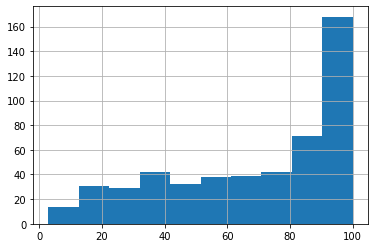

In [82]:
df["AGE"].hist()

6) 使用直方图展示每个城镇MV的情况

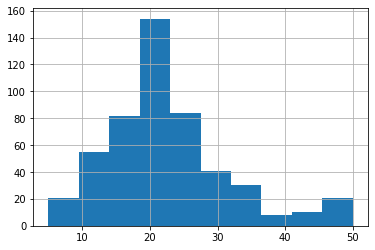

In [83]:
df["MV"].hist()

 <h1, align=center> 概率质量函数和正态分布 </h1>

概率质量函数和正态分布可以帮助你轻松地从整体上理解你的数据，并度量它们的属性 

假设我们要得到以下的值：

在波士顿，房屋具有20年房龄的概率是多少？
在波士顿，房屋具有30年房龄的概率是多少？

我们可以用 P(X = 20)或 P(X = 30)来表示.这个概率函数表示一间位于波士顿的随机选中的房屋X，对特定的房龄值x，其房龄等于x的概率是多大？这个概率可以用函数f(x)表示，它被称为概率质量函数（__probability mass function__）. 

__注意 1:__ P(X = 1) + P(X = 2)+ .. +P(X = 100) = 1   
__注意 2:__ 如果可选值是连续（非离散）的话，我们需要使用概率密度函数 （__probability density function__）, 

现在让我们将数据的概率密度函数与正态分布在图形上作些比较。

1)  波士顿AGE的分布是正态分布吗？

Text(0, 0.5, 'Probability')

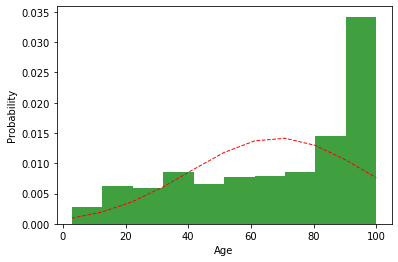

In [86]:
mu=df['AGE'].mean()
sigma=df['AGE'].std()
x=df['AGE'].values.flatten() #actual values of age of the houses

# the parameters of histogram of the data
# 10 is number of bins
# normed = 1, means the histogram is normalized
n, bins, patches = plt.hist(x, 10, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Probability')

数据没有呈现出一个中间钟型的凸起，所以不是正态分布

2) 波士顿MV的分布是正态分布吗？

Text(0, 0.5, 'Probability')

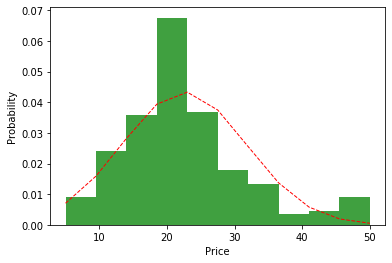

In [85]:
mu=df['MV'].mean()
sigma=df['MV'].std()
x=df['MV'].values.flatten() #actual values of age of the houses

# the parameters of histogram of the data
# 10 is number of bins
# normed = 1, means the histogram is normalized
n, bins, patches = plt.hist(x, 10, density=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Price')
plt.ylabel('Probability')

从形状上看是的。

通过图去观察数据是十分实用的。通过图，我们还能回答关于区间的问题，比如价格在10k到15k之间的概率。


## 数据探索： 总览、统计、分组、箱线图 和 相关性
让我们加载另一个数据集

####  数据集

数据源: https://archive.ics.uci.edu/ml/datasets/Automobile

#### 数据集信息:
这个数据源包括三种不同类型的实体：(a)关于汽车各种属性的规格说明，(b) 汽车被指定的保险风险等级，（c）与其他汽车相比的规格化的损赔。
第二个实体所表示的等级对应的是汽车相对于其价格而言风险更大的程度。汽车最初被赋予的风险等级与其价格相关，如果之后发现其风险更大或者更小，这个等级就会相应地向上或向下调整。例如，等级为+3就表示是该车风险较大，-3表示该车比较安全。
第三个实体所表示的因素是每个被保险车辆年的相对平均损赔。这个值是在特定的尺寸分类(双门小型车、旅行车、运动型/专业型车，等等)下的所有汽车中规格化的值，表示每辆车每年的平均损失。

In [45]:
# import pandas library
import pandas as pd
# read the online file by the URL provides above, and assign it to variable "df"

#linux !wget --output-document /resources/data/df-Automobile-cleaned.csv https://ibm.box.com/shared/static/uxc0it2dyu0ecrw14aoj9yspz8gh446r.csv
#自行下载    
#linux df = pd.read_csv("/resources/data/df-Automobile-cleaned.csv")
df = pd.read_csv("resources/data/df-Automobile-cleaned.csv")
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
1,0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,...,152,idi,3.7,3.52,21.0,95,4150,25,25,13860
2,0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,152,idi,3.7,3.52,21.0,95,4150,28,33,16900
3,0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,...,152,idi,3.7,3.52,21.0,95,4150,25,25,17075
4,0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,152,idi,3.7,3.52,21.0,95,4150,28,33,17950


### 总览
使用describe方法得到一个大致的总览

In [46]:
# summary statistics using pandas method
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.793814,98.923196,174.344330,65.896907,53.878351,2560.896907,128.092784,3.330928,3.249588,10.208351,103.278351,5097.422680,25.381443,30.845361,13272.190722
std,1.233707,6.136456,12.448722,2.132694,2.391424,525.402643,41.484895,0.271711,0.314766,4.068311,37.967601,468.592376,6.417178,6.846716,8070.079890
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.425000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.250000,25.000000,7747.250000
50%,1.000000,97.100000,173.200000,65.450000,54.100000,2417.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10270.000000
75%,2.000000,102.400000,184.325000,66.900000,55.675000,2947.750000,145.750000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16512.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


如果我们想得到特定的一些列的汇总结果呢（比如值是字符串的）？

In [47]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,194,194,194,194,194,194,194,194,194,194
unique,21,2,2,3,5,3,2,5,6,7
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,174,159,112,93,115,191,142,154,88


### 计数:
我们还可以使用__value-counts__方法得到每个属性/变量有几个元素

In [48]:
# drive-wheels as variable
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head(10)

,value_counts
drive-wheels,
fwd,115
rwd,71
4wd,8


In [49]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,191
rear,3


我们发现只有3辆车是后置发动机，191辆是前置发动机，数据倾斜过于严重，所以从发动机位置这个角度去判断价格是不太合理的。

### 分组:
另一个观察数据的方法是分组：

groupby函数可以根据某一列的值进行分组，然后进行统计。这将方便我们观察某一个变量对另外一个变量的影响。

你可以按一个变量分组，例如按"drive-wheels"分组，会发现一共有三组。

In [50]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

如果我们想知道哪种驱动方式最值钱，我们可以统计每个分类下的价格平均值。

In [51]:
# grouping results
df_group_one=df[['drive-wheels','body-style','price']]
df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.660870
2,rwd,20137.197183



通过数据，我们发现4轮驱动和前轮驱动基本价格相似，但是后轮驱动明显更贵。

同样你可以同时按多个变量分组，比如"drive-wheels" 和 "body-style".


In [52]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9835.018519
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


表格数据看起来有点累，如果我们把它们放进一个数据透视表会看得更加清楚。现在让我们使用pivot函数去创建一个数据透视表，我们把drive-wheel当成行变量，body-style作为列变量。

In [53]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9835.018519   
rwd              23949.6  24202.714286  14714.285714  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

有时候，表格的一些格子中没有数据（NaN），我们可以通过用0填充的方法解决。

In [54]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9835.018519   
rwd              23949.6  24202.714286  14714.285714  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

### 箱线图:

使用箱线图是一种不错的用来观察某一类的数据的方法：

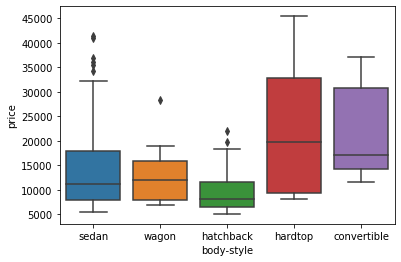

In [55]:
# body-style
sns.boxplot(x="body-style", y="price", data=df)

我们发现在不同 body-style分类下的价格分布重叠太多，所以body-style不是一个值得研究的属性。

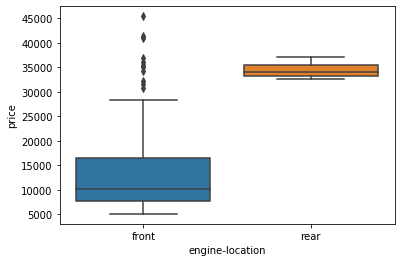

In [56]:
# engine-location
sns.boxplot(x="engine-location", y="price", data=df)

现在我们发现根据engine-location的价格分布比较适合做价格预测。


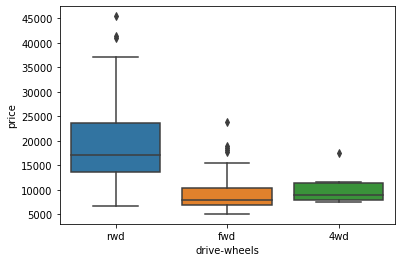

In [57]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

同样的，发现根据drive-wheels的价格分布比较适合做价格预测。

## 相关性

**相关性**: 相关性是一个测量不同变量之间是否独立的统计度量。 

**因果关系**: 两个变量之间的因果关系。

需要注意的是，相关性与因果关系是不同的概念。如前所述，数据科学更加适合探索数据相关性。

让我们检测下engine-size和price的相关性

我们使用下列散点分析命令来可视化两个变量，并且添加一个回归线。
我们可以使用seaborn的regplot()命令来显示散点图

(0, 57781.30755627382)

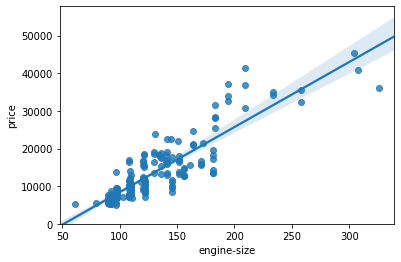

In [58]:
sns.regplot(x="engine-size", y="price",data=df)
plt.ylim(0,)

#### 正线性相关: 
engine-size的增大会导致价格的增大。



#### 负相关关系
让我们查看一下highway-mpg与price的关系：

highway-mpg的增加会导致价格的降低。


(0, 48311.075528334935)

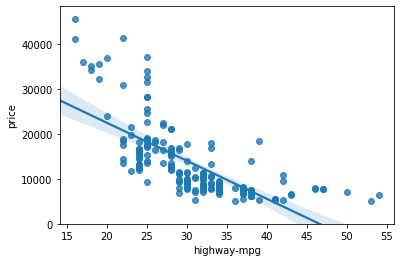

In [59]:
sns.regplot(x="highway-mpg", y="price",data=df)
plt.ylim(0,)

#### 弱线性关系

Peak-rpm看上去就和price没什么关系了，回归线几乎是平的

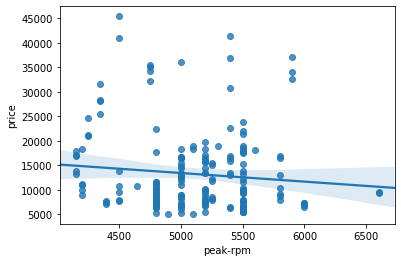

In [60]:
# Peak rpm as a predictor variable of price
sns.regplot(x="peak-rpm", y="price", data=df)

#### 所有变量之间的相关性如何呢?

现在的问题是：“哪个属性是最主要的影响价格的因素”

我们之前的问题都是针对某一个变量对价格影响如何，现在让所有变量都对price来一次相关性检测。可以使用corr方法来简单完成这个功能。


In [61]:
df.corr()["price"]

symboling           -0.083694
wheel-base           0.584839
length               0.695174
width                0.753854
height               0.134953
curb-weight          0.835412
engine-size          0.888745
bore                 0.545746
stroke               0.095220
compression-ratio    0.067704
horsepower           0.811641
peak-rpm            -0.102037
city-mpg            -0.704035
highway-mpg         -0.716619
price                1.000000
Name: price, dtype: float64

现在，我们发现了是__engine-size__ ，且他的相关系数为0.888745

#### 什么是相关系数?

相关性（皮尔逊相关）表示了变量X和Y之间的线性依赖程度。结果在-1到1之间。
- **1**: 完全正相关
- **0**: 没有线性关系
- **-1**: 完全负相关 


#### 高的相关系数是否就说明了两个变量十分相关？ 

除了相关系数，我们还可以看 __p-vaue__。P-value帮助我们确认找的相关系数是否可信。

**什么是 P-value?**:  
P-value是两个变量之间相关性是否显著的概率。通常地，我们把0.05设为一个显著水平，也就是说这个相似性有95%的置信度。

大致地：
- p-value<0.001 我们认为相关性十分可信
- p-value<0.05, 我们认为相关性比较可信
- p-value<0.1, 我们认为相关性不太可信
- p-value>0.1, 我们认为相关性不可信

In [62]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
#python2 print "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value   
print ("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8116408108736768  with a P-value of P = 1.0540547138316754e-46


#### 结论:
horsepower和price的相关性中，线性相关性比较高(~0.809, 接近1)，p-value小于0.001的

#### 那么三组数据之间或者不同的大小的相关性如何?

我们在这个场合使用透视表，我们的变量是Drive Wheels和Body Style。我们需要找到这两个变量和price的关系。


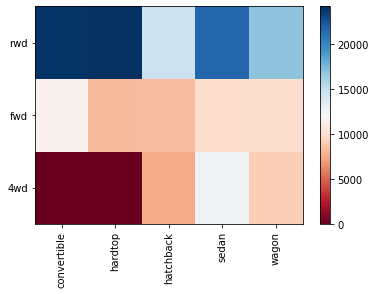

In [63]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 分类离散变量和连续变量之间的关系

比入drive-wheels和price之间的关系是什么？

我们可以使用ANOVA测试去计算它。

In [64]:
df_cat = df[['drive-wheels','price']]
df_cat.head()

,drive-wheels,price
0,rwd,13200
1,rwd,13860
2,rwd,16900
3,rwd,17075
4,rwd,17950


现在，我们在上述两列里面跑测试，如果价格在不同的drive-wheels类别表现出巨大差异，那么drive-wheels就是高度相关的。ANOVA测试会返回一个大的F-test分数和一个小的p-value


#### ANOVA: 方差分析
这是一个统计学方法，用于测试两组数据的平均值是否有明显的不同。返回两个值

**F-测试分数**: ANOVA假设所有组别的平均值是相同的，计算实际与预期的偏差有多大。其偏差越大，F-test分数越大。 

**P-值 **: 与之前的相关系数置信度相同，就是表示F-测试分数的可信程度

In [65]:
df_rwd = df[df['drive-wheels']=='rwd']['price']
df_fwd = df[df['drive-wheels']=='fwd']['price']
df_4wd = df[df['drive-wheels']=='4wd']['price']

In [66]:
f_val, p_val = stats.f_oneway(df_rwd, df_fwd, df_4wd)
#python2 print "ANOVA results: F=", f_val, ", P =", p_val   
print ("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 69.28855699871455 , P = 2.3647685283820182e-23


结果非常棒，也就是 F test很大，然后p-value几乎为0，这表示__drive-wheels和price强相关__，具有几乎确定的统计显著性。
